In [3]:
jnk = ni.load('/Users/jakevogel/Science/tau/other_clustering_attempts/byhand/brain_rois.nii.gz').get_data()
len(np.unique(jnk))

731

In [1]:
import pandas
import itertools
import nibabel as ni
import numpy as np
import scipy.stats as st
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from glob import glob
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
atlas_paths = {'vcons':'/Users/jakevogel/Science/tau/tau_masks/1mm_lund/brain_partition_consensus_ind_lund_sci5_scf5.nii.gz',
              'vcore':'/Users/jakevogel/Science/tau/tau_masks/1mm_lund/brain_partition_core_ind_lund_sci5_scf5.nii.gz',
              'scholl':'/Users/jakevogel/Science/tau/tau_masks/shipping/tau_masks/berkeley/dkt_Braak_new_atlas.nii',
              'cho':'/Users/jakevogel/Science/tau/tau_masks/shipping/tau_masks/cho/dkt_Cho_new_atlas.nii',
              'swartz':'/Users/jakevogel/Science/tau/tau_masks/shipping/schwarz_1mm/schwartz_atlas.nii.gz'
               }

In [7]:
maskr = ni.load(atlas_paths['vcons']).get_data().astype(int)

In [10]:
data_dict = {}
for nm,path in atlas_paths.items():
    print('working on',nm)
    dat = ni.load(path).get_data().astype(int)
    dat = dat[maskr>0]
    unis = np.unique(dat)
    for uni in unis:
        if uni == 0 or uni > 9:
            continue
        else:
            print('working on',uni)
            jnk = deepcopy(dat)
            jnk[jnk!=uni] = 0
            data_dict.update({'%s_%s'%(nm,uni): jnk.flatten()})
    print('working on stages')
    if 'vco' not in nm:
        for uni in unis:
            if uni < 2 or uni > 9:
                continue
            else:
                print('working on',uni)
                jnk = deepcopy(dat)
                jnk[jnk>uni] = 0
                data_dict.update({'%s_stage%s'%(nm,uni):jnk.flatten()})

working on vcons
working on 1
working on 2
working on 3
working on 4
working on 5
working on stages
working on cho
working on 1
working on 2
working on 3
working on 4
working on 5
working on stages
working on 2
working on 3
working on 4
working on 5
working on vcore
working on 1
working on 2
working on 3
working on 4
working on 5
working on stages
working on swartz
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on stages
working on 2
working on 3
working on 4
working on 5
working on 6
working on scholl
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on stages
working on 2
working on 3
working on 4
working on 5
working on 6


In [13]:
data_dict = pandas.DataFrame(index=range(len(y)))
for nm,path in atlas_paths.items():
    print('working on',nm)
    dat = ni.load(path).get_data().astype(int)
    dat=dat[maskr>0]
    unis = np.unique(dat)
    for uni in unis:
        if uni == 0 or uni > 9:
            continue
        else:
            print('working on',uni)
            jnk = deepcopy(dat)
            jnk[jnk!=uni] = 0
            data_dict.ix[:,'%s_%s'%(nm,uni)] = jnk.flatten()
    if 'vco' not in nm:
        print('working on stages')
        for uni in unis:
            if uni < 2 or uni > 9:
                continue
            else:
                print('working on',uni)
                jnk = deepcopy(dat)
                jnk[jnk>uni] = 0
                data_dict.ix[:,'%s_stage%s'%(nm,uni)] = jnk.flatten()

working on vcons
working on 1
working on 2
working on 3
working on 4
working on 5
working on cho
working on 1
working on 2
working on 3
working on 4
working on 5
working on stages
working on 2
working on 3
working on 4
working on 5
working on vcore
working on 1
working on 2
working on 3
working on 4
working on 5
working on swartz
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on stages
working on 2
working on 3
working on 4
working on 5
working on 6
working on scholl
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on stages
working on 2
working on 3
working on 4
working on 5
working on 6


In [14]:
data_dict.shape

(642104, 41)

In [12]:
x = data_dict['vcore_4']
y = data_dict['cho_stage4']

In [15]:
x2 = data_dict['vcore_5']
y2 = data_dict['cho_stage5']

In [16]:
y.shape

(642104,)

In [17]:
normalized_mutual_info_score(x,y)

0.042252284690796824

In [33]:
import scipy.spatial.distance as dist

In [53]:
dist.cosine(x,y)

0.52818489487988829

In [34]:
ham_scores = [dist.hamming(data_dict[x].values,data_dict[y].values) for x,
        y in itertools.combinations(
        no_swartz,2)]

In [18]:
vcols = [x for x in data_dict.columns if 'vco' in x]
no_vcols = [x for x in data_dict.columns if 'vco' not in x]


In [19]:
no_swartz = [x for x in data_dict.columns if 'swartz' not in x]
swartz = [x for x in data_dict.columns if 'swartz' in x]

In [20]:
nmi_scores = np.full((len(no_swartz),len(no_swartz)),np.nan)
nmi_scores.shape

(30, 30)

In [21]:
len(no_swartz)

30

In [32]:
(.5 * len(list(itertools.combinations(no_swartz,2)))) / 60

3.625

In [31]:
%%timeit
scores = [normalized_mutual_info_score(data_dict[x].values,data_dict[y].values) for x,
        y in itertools.combinations(
        data_dict.columns[:3],2)]

1 loop, best of 3: 581 ms per loop


In [35]:
%%timeit
jnk = []
for x,y in itertools.combinations(data_dict.columns[:3],2):
    print('working on',x,y)
    jnk.append(normalized_mutual_info_score(data_dict[x].values,data_dict[y].values))

working on vcons_1 vcons_2
working on vcons_1 vcons_3
working on vcons_2 vcons_3
working on vcons_1 vcons_2
working on vcons_1 vcons_3
working on vcons_2 vcons_3
working on vcons_1 vcons_2
working on vcons_1 vcons_3
working on vcons_2 vcons_3
working on vcons_1 vcons_2
working on vcons_1 vcons_3
working on vcons_2 vcons_3
1 loop, best of 3: 585 ms per loop


In [22]:
scores = [normalized_mutual_info_score(data_dict[x].values,data_dict[y].values) for x,
        y in itertools.combinations(
        no_swartz,2)]

In [77]:
list(itertools.combinations(no_swartz,2))

[('vcons_1', 'vcons_2'),
 ('vcons_1', 'vcons_3'),
 ('vcons_1', 'vcons_4'),
 ('vcons_1', 'vcons_5'),
 ('vcons_1', 'vcore_1'),
 ('vcons_1', 'vcore_2'),
 ('vcons_1', 'vcore_3'),
 ('vcons_1', 'vcore_4'),
 ('vcons_1', 'vcore_5'),
 ('vcons_1', 'cho_1'),
 ('vcons_1', 'cho_2'),
 ('vcons_1', 'cho_3'),
 ('vcons_1', 'cho_4'),
 ('vcons_1', 'cho_5'),
 ('vcons_1', 'cho_stage2'),
 ('vcons_1', 'cho_stage3'),
 ('vcons_1', 'cho_stage4'),
 ('vcons_1', 'cho_stage5'),
 ('vcons_1', 'scholl_1'),
 ('vcons_1', 'scholl_2'),
 ('vcons_1', 'scholl_3'),
 ('vcons_1', 'scholl_4'),
 ('vcons_1', 'scholl_5'),
 ('vcons_1', 'scholl_6'),
 ('vcons_1', 'scholl_stage2'),
 ('vcons_1', 'scholl_stage3'),
 ('vcons_1', 'scholl_stage4'),
 ('vcons_1', 'scholl_stage5'),
 ('vcons_1', 'scholl_stage6'),
 ('vcons_2', 'vcons_3'),
 ('vcons_2', 'vcons_4'),
 ('vcons_2', 'vcons_5'),
 ('vcons_2', 'vcore_1'),
 ('vcons_2', 'vcore_2'),
 ('vcons_2', 'vcore_3'),
 ('vcons_2', 'vcore_4'),
 ('vcons_2', 'vcore_5'),
 ('vcons_2', 'cho_1'),
 ('vcons_2', '

In [23]:
scr_mtx = np.full((30,30),np.nan)

In [24]:
utri_ind = list(itertools.combinations(range(30),2))

In [116]:
xs =

In [25]:
uxs = np.array([x[0] for x in utri_ind])
uys = np.array([x[1] for x in utri_ind])

In [26]:
len(scr_mtx[(xs,ys)]) == len(scores)

NameError: name 'xs' is not defined

In [27]:
xs = np.array([x[0] for x in utri_ind])
ys = np.array([x[1] for x in utri_ind])

In [72]:
#scr_mtx[(xs,ys)] = ham_scores
scr_mtx[(xs,ys)] = scores

In [73]:
scr_mtx

array([[             nan,   2.99406413e-02,   2.79183951e-02,
          5.47982536e-02,   2.25625093e-02,   2.91999242e-03,
          6.44615417e-03,   1.64196269e-02,   9.56819986e-02,
          1.64358841e-02,   7.13322171e-03,   1.79820105e-02,
          1.15111339e-01,   1.48010102e-01,   4.27963156e-01,
          1.75169930e-02,   1.84059021e-02,   2.76418682e-02,
          1.32960141e-02,   2.91999242e-03,   1.92692665e-01,
          1.00806870e-02,   1.26350756e-02,   7.51014375e-03,
          1.64358841e-02,   1.53655235e-01,   9.23440389e-02,
          7.73130429e-02,   6.53424336e-02,   6.40789161e-02],
       [  2.49894098e-01,              nan,   1.08201140e-01,
          2.17319789e-01,   8.71077405e-02,   1.19699757e-02,
          3.45937239e-02,   6.31402018e-02,   1.08585435e-01,
          6.02528481e-02,   3.65894433e-02,   7.55151782e-02,
          1.00060816e-01,   1.05063824e-01,   1.54508590e-02,
          4.61122447e-01,   7.08651005e-02,   1.07107332e-01,
       

In [112]:
print(np.tril_indices(4))
print(np.triu_indices(4))
print(list(itertools.combinations_with_replacement([3,2,1,0],2)))

(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3]), array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3]))
(array([0, 0, 0, 0, 1, 1, 1, 2, 2, 3]), array([0, 1, 2, 3, 1, 2, 3, 2, 3, 3]))
[(3, 3), (3, 2), (3, 1), (3, 0), (2, 2), (2, 1), (2, 0), (1, 1), (1, 0), (0, 0)]


In [74]:
ltri_ind = list(itertools.combinations(range(29,-1,-1),2))
lxs = np.array([x[0] for x in ltri_ind])
lys = np.array([x[1] for x in ltri_ind])
scr_mtx[(lxs,lys)] = scr_mtx.transpose()[(lxs,lys)]

In [75]:
ltri_ind = list(itertools.combinations(range(29,-1,-1),2))
lxs = np.array([x[0] for x in ltri_ind])
lys = np.array([x[1] for x in ltri_ind])
scr_mtx[(lxs,lys)] = scr_mtx.transpose()[(lxs,lys)]
scrdf = pandas.DataFrame(scr_mtx,index=no_swartz,columns=no_swartz)
scrdf.columns = no_swartz
scrdf.labels = no_swartz
scrdf

,vcons_1,vcons_2,vcons_3,vcons_4,vcons_5,cho_1,cho_2,cho_3,cho_4,cho_5,...,scholl_2,scholl_3,scholl_4,scholl_5,scholl_6,scholl_stage2,scholl_stage3,scholl_stage4,scholl_stage5,scholl_stage6
vcons_1,NaN,0.029941,0.027918,0.054798,0.022563,0.002920,0.006446,0.016420,0.095682,0.016436,...,0.192693,0.010081,0.012635,7.510144e-03,0.016436,0.153655,0.092344,0.077313,0.065342,0.064079
vcons_2,0.029941,NaN,0.108201,0.217320,0.087108,0.011970,0.034594,0.063140,0.108585,0.060253,...,0.017308,0.048560,0.012940,7.221987e-02,0.060253,0.021137,0.053202,0.049858,0.065938,0.080197
vcons_3,0.027918,0.108201,NaN,0.201826,0.081149,0.080901,0.082998,0.173341,0.092791,0.058793,...,0.007900,0.025814,0.113836,6.062543e-02,0.058793,0.056305,0.055328,0.150548,0.123495,0.128706
vcons_4,0.054798,0.217320,0.201826,NaN,0.161485,0.021858,0.002369,0.005530,0.031291,0.009907,...,0.031622,0.005330,0.014453,3.193401e-02,0.009907,0.038644,0.026771,0.032239,0.033361,0.034978
vcons_5,0.022563,0.087108,0.081149,0.161485,NaN,0.009026,0.021214,0.047499,0.030769,0.274855,...,0.013048,0.016053,0.033313,7.618406e-02,0.274855,0.015933,0.021579,0.037669,0.140440,0.171008
cho_1,0.002920,0.011970,0.080901,0.021858,0.009026,NaN,0.003635,0.006571,0.038320,0.006578,...,0.001813,0.005082,0.010328,3.200547e-02,0.006578,0.613232,0.344334,0.229990,0.186518,0.176968
cho_2,0.006446,0.034594,0.082998,0.002369,0.021214,0.003635,NaN,0.019062,0.112305,0.019081,...,0.005253,0.606803,0.029987,9.358447e-02,0.019081,0.006413,0.503643,0.336397,0.272813,0.258844
cho_3,0.016420,0.063140,0.173341,0.005530,0.047499,0.006571,0.019062,NaN,0.207500,0.034557,...,0.009499,0.026675,0.511556,1.721139e-01,0.034557,0.011598,0.029174,0.388647,0.315187,0.299049
cho_4,0.095682,0.108585,0.092791,0.031291,0.030769,0.038320,0.112305,0.207500,NaN,0.207717,...,0.055494,0.013353,0.041614,4.693531e-01,0.207717,0.067898,0.050791,0.075282,0.424218,0.402498
cho_5,0.016436,0.060253,0.058793,0.009907,0.274855,0.006578,0.019081,0.034557,0.207717,NaN,...,0.009509,0.026701,0.054461,1.722916e-01,1.000000,0.011609,0.029203,0.065818,0.294521,0.485124


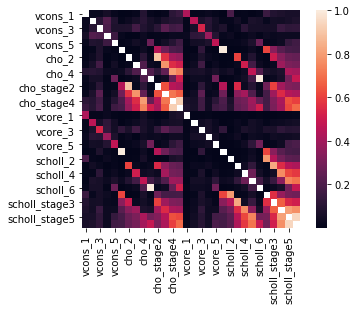

In [76]:
plt.close()
sns.heatmap(scrdf,square=True)
plt.show()

In [77]:
nocore = [x for x in scrdf.columns if 'core' not in x]
nocore

['vcons_1',
 'vcons_2',
 'vcons_3',
 'vcons_4',
 'vcons_5',
 'cho_1',
 'cho_2',
 'cho_3',
 'cho_4',
 'cho_5',
 'cho_stage2',
 'cho_stage3',
 'cho_stage4',
 'cho_stage5',
 'scholl_1',
 'scholl_2',
 'scholl_3',
 'scholl_4',
 'scholl_5',
 'scholl_6',
 'scholl_stage2',
 'scholl_stage3',
 'scholl_stage4',
 'scholl_stage5',
 'scholl_stage6']

In [78]:
vog_cons_snap = scrdf.loc[scrdf.index[:5]][nocore[5:]]
vog_cons_snap.index = ['Subcortex/Hipp','Frontal','Medial/Anterior Temporal',
                      'Temporo-parietal','Sensorimotor/Visual']

In [79]:
jnk = vog_cons_snap.columns.tolist()
for i,col in enumerate(jnk):
    if 'cho_' in col:
        num = int(col[-1])
        if num>1:
            jnk[i] = col[:-1]+str(num+1)
vog_cons_snap.columns = jnk
            

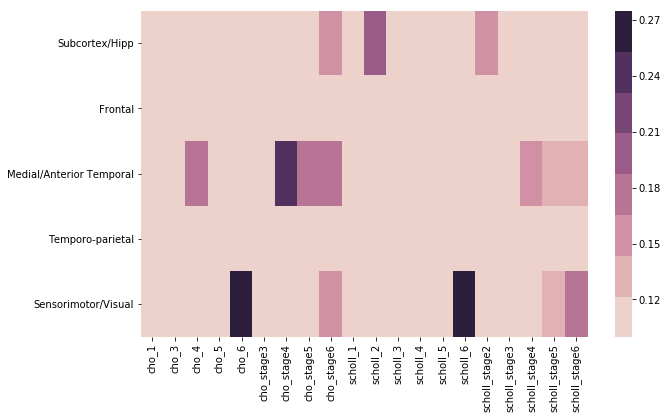

In [87]:
plt.close()
fig,ax = plt.subplots(figsize=(10,6))
#sns.heatmap(vog_cons_snap,cmap='RdBu_r',vmin=0.1)
sns.heatmap(vog_cons_snap,cmap=sns.cubehelix_palette(8), vmin=0.1)
plt.show()

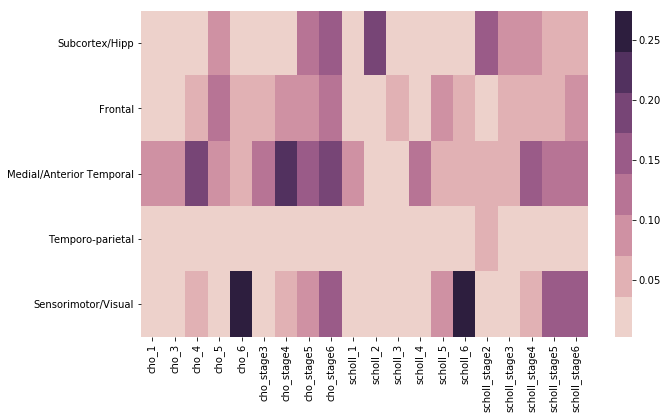

In [86]:

plt.close()
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(vog_cons_snap, cmap=sns.cubehelix_palette(8))
jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/nmi.pdf',
#            bbox_inches='tight')
plt.show()


In [54]:
def overlap(lab1,lab2,data):
    x = data[lab1]
    y = data[lab2]
    newx = deepcopy(x)
    newy = deepcopy(y)
    newx[newx<1] = 0
    newy[newy<1] = 0
    xtot = len(newx[newx>0])
    ytot = len(newy[newy>0])
    
    overlap = len(newx[newy>0][newx[newy>0]>0])
    overlap_xy = overlap / xtot
    overlap_yx = overlap / ytot
    
    del(newx,newy)
    return overlap_xy,overlap_yx

In [55]:
x = 'vcons_4'
y = 'swartz_5'
overlap(x,y,data_dict)

(0.0032352294500109934, 0.41365461847389556)

In [56]:
sw_olap = pandas.DataFrame(index=vcols,columns=swartz)
for x in vcols:
    print('working on',x)
    for y in swartz:
        ox,oy = overlap(x,y,data_dict)
        sw_olap.ix[x,y] = oy

working on vcons_1
working on vcons_2
working on vcons_3
working on vcons_4
working on vcons_5
working on vcore_1
working on vcore_2
working on vcore_3
working on vcore_4
working on vcore_5


In [57]:
snapshot2 = sw_olap.loc[sw_olap.index[:5]]
snapshot2.index = ['Subcortex/Hipp','Frontal','Medial/Anterior Temporal',
                    'Temporo-parietal','Sensorimotor/Visual']

In [58]:
jnk = ['schwarz_%s'%(x[7:]) for x in snapshot2.columns]
snapshot2.columns = jnk

In [59]:
snapshot2 = snapshot2.astype(float)

In [67]:
sns.heatmap?

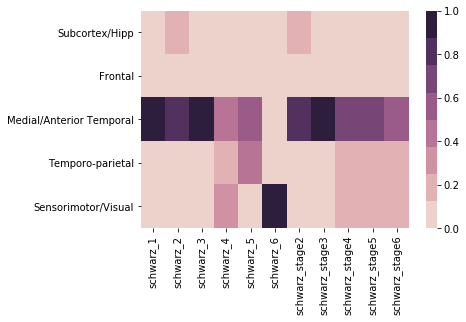

In [68]:
plt.close()
#fig = sns.heatmap(snapshot2.dropna(),cmap='RdBu_r')
fig = sns.heatmap(snapshot2.dropna(),cmap=sns.cubehelix_palette(8))
jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/olap.pdf',
 #           bbox_inches='tight')
plt.show()

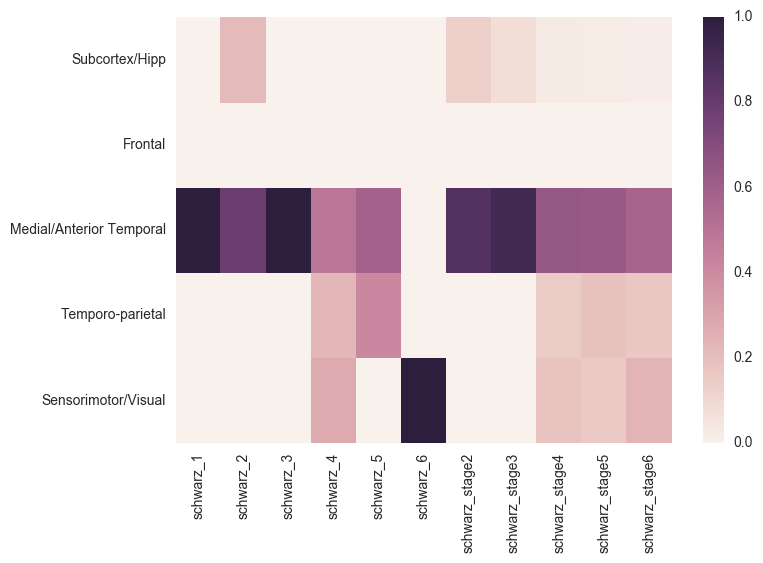

In [189]:
plt.close()
fig = sns.heatmap(snapshot2.dropna())
jnk = fig.get_figure()
jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/olap.pdf',
            bbox_inches='tight')
plt.show()

In [179]:
data_dict.columns[10:21]

Index(['swartz_1', 'swartz_2', 'swartz_3', 'swartz_4', 'swartz_5', 'swartz_6',
       'swartz_stage2', 'swartz_stage3', 'swartz_stage4', 'swartz_stage5',
       'swartz_stage6'],
      dtype='object')

In [121]:
dkt = ni.load('/Users/jakevogel/Science/tmp/tau/dkt_atlas_1mm.nii.gz').get_data().astype(int)
vcore_img = ni.load(atlas_paths['vcons']).get_data().astype(int)

In [14]:
dkt[maskr<1] = 0

In [15]:
labels = pandas.read_csv('/Users/jakevogel/git/pycourse_vuMC/stuff/dst_labels.csv',
                        header=None)
labels.index = labels[:][labels.columns[0]]
labels.drop(labels.columns[0],axis=1,inplace=True)
labels.columns = ['roi']
labels.head()

,roi
0,
1,Caudal anterior cingulate
2,Caudal middle frontal
3,Cuneus
4,entorinal
5,fusiform


In [16]:
nlcols = []
for i,row in labels.iterrows():
    if i < 40:
        nlcols.append('l_%s'%(row['roi']))
    else:
        nlcols.append('r_%s'%(row['roi']))
labels.ix[:,'roi'] = nlcols
labels.head()

,roi
0,
1,l_ Caudal anterior cingulate
2,l_ Caudal middle frontal
3,l_ Cuneus
4,l_ entorinal
5,l_ fusiform


In [17]:
len(roi[roi>0])

NameError: name 'roi' is not defined

In [34]:
roi = vcore_img[dkt==i]
counts = np.bincount(roi)
print(counts)
unique = list(np.unique(roi))
print(unique)
size = len(roi[roi>0])
print(size)
while 0 in unique:
    unique.remove(0)
for x,u in enumerate(unique):
    if u != 0:
        percs.ix[labels.ix[i,'roi'],percs.columns[u-1]] = (counts[x]/size)

[814   0   0  14   3]
[0, 3, 4]
17


NameError: name 'percs' is not defined

In [94]:
labels.loc[36]

roi    l_ Hippocampus
Name: 36, dtype: object

In [111]:
labels.loc[75]

roi    r_ Hippocampus
Name: 75, dtype: object

In [115]:
jnk = deepcopy(vcore_img)
jnk[dkt==75] = 1000
#jnk[jnk<1000] = 0
#jnk[jnk>0] = 1
print(np.unique(jnk))
#nimg = ni.Nifti1Image(jnk,ni.load(atlas_paths['vcore']).affine)
#nimg.to_filename('/Users/jakevogel/Science/tmp/tau/tmp_fl')

[0 1]


In [122]:
i = 75
row = labels.loc[i]
print('working on',row['roi'])
roi = vcore_img[dkt==i]
counts = list(np.bincount(roi))
unique = np.unique(roi)
size = len(roi[roi>0])
print(counts,unique,size)
print(len(roi[roi==1]))

working on r_ Hippocampus
[3135, 3003, 0, 1296] [0 1 3] 4299
3003


In [123]:
percs = pandas.DataFrame(index = labels['roi'], columns = snapshot2.index)
for i,row in labels.iterrows():
    if i > 0:
        print('working on',row['roi'])
        roi = vcore_img[dkt==i]
        counts = list(np.bincount(roi))
        unique = np.unique(roi)
        size = len(roi[roi>0])
        while 0 in counts:
            counts.remove(0)
        for x,u in enumerate(unique):
            if u != 0:
                percs.ix[labels.ix[i,'roi'],percs.columns[u-1]] = (counts[x]/size)
                

working on l_ Caudal anterior cingulate
working on l_ Caudal middle frontal
working on l_ Cuneus
working on l_ entorinal
working on l_ fusiform
working on l_ Inferior parietal
working on l_ Inferior temporal
working on l_ Isthmus cingulate
working on l_ Lateral Occipital
working on l_ Lateral orbitofronal
working on l_ Lingual gyrus
working on l_ Medial orbitofrontal
working on l_ Middle temporal
working on l_ Parahippocampal
working on l_ Paracentral 
working on l_ Pars opercularis
working on l_ Pars orbitalis
working on l_ Pars triangularis
working on l_ Pericalcarine
working on l_ Postcentral
working on l_ Posterior cingulate
working on l_ Precentral
working on l_ Precuneus
working on l_ Rostral anterior cingulate
working on l_ Rostral middle frontal
working on l_ Superior frontal
working on l_ Superior parietal
working on l_ Superior Temporal
working on l_ Supramarginal
working on l_ Transverse temporal
working on l_ Insula
working on l_ Basal forebrain
working on l_ Amygdala
worki

In [124]:
for x in percs.index:
    for y in percs.columns:
        if not pandas.notnull(percs.ix[x,y]):
            percs.ix[x,y] = 0

In [125]:
percs.index = [x for x[:-3] in percs.index if '?' in x else x]

SyntaxError: invalid syntax (<ipython-input-125-0df5b7806d26>, line 1)

In [126]:
percs

,Subcortex/Hipp,Frontal,Medial/Anterior Temporal,Temporo-parietal,Sensorimotor/Visual
roi,,,,,
l_ Caudal anterior cingulate,0,0.691631,0,0,0.308369
l_ Caudal middle frontal,0,0.0167104,0,0.98329,0
l_ Cuneus,0,0,0,0.0360513,0.963949
l_ entorinal,0,0,1,0,0
l_ fusiform,0,0,0.81923,0.166132,0.0146381
l_ Inferior parietal,0,0,0,1,0
l_ Inferior temporal,0,0,0.982719,0.0172809,0
l_ Isthmus cingulate,0.00562852,0,0.00375235,0.987617,0.00300188
l_ Lateral Occipital,0,0,0.00145445,0.627661,0.370885


In [128]:
spercs = percs.sort_values(percs.columns.tolist(),0,False)

In [137]:
spercs.drop('r_ L Cerebellum',axis=0,inplace=True)
spercs.drop('r_ R Cerebellum',axis=0,inplace=True)
#spercs.index

In [61]:
sns.heatmap?

In [147]:
spercs.loc[[x for x in spercs.index if 'nsula' in x]]

,Subcortex/Hipp,Frontal,Medial/Anterior Temporal,Temporo-parietal,Sensorimotor/Visual
roi,,,,,
r_ Insula,0,0.148706,0.606706,0.244588,0
l_ Insula,0,0.139899,0.703123,0.156977,0


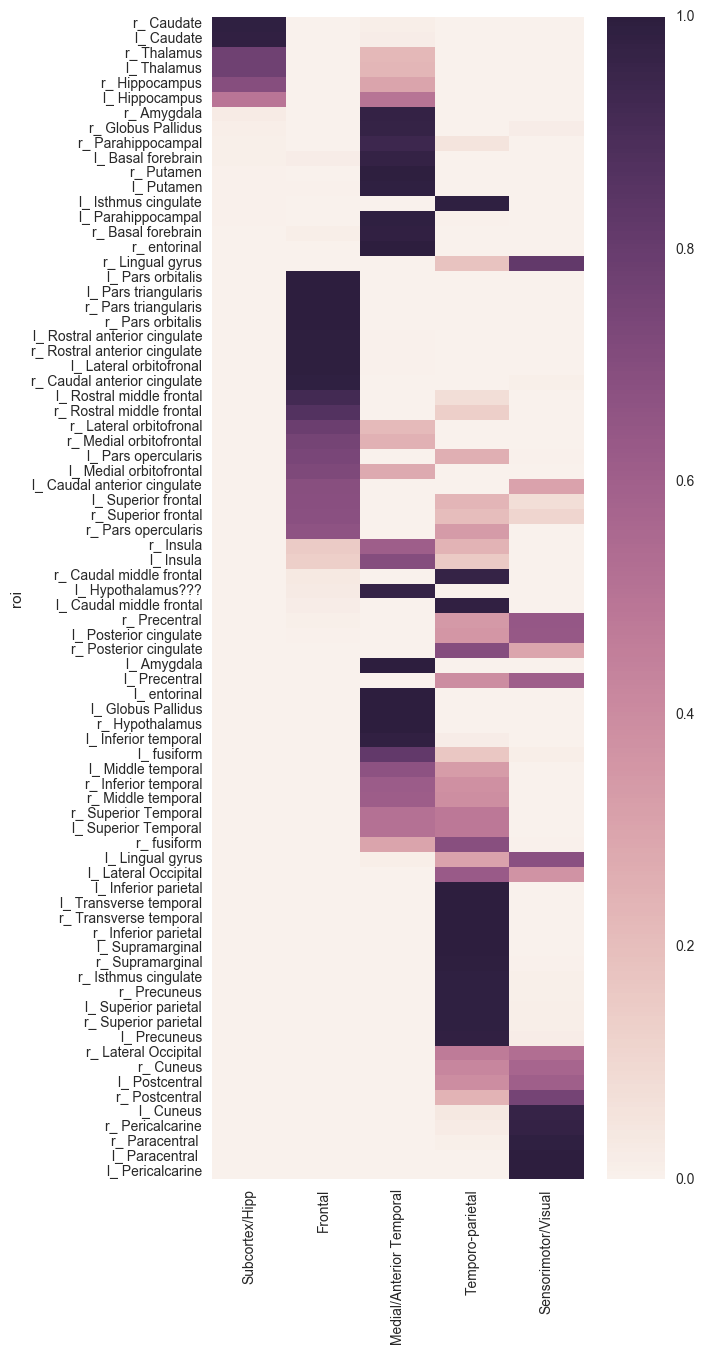

In [143]:
plt.close()
fig, ax = plt.subplots(figsize=(6,15))
sns.heatmap(spercs.astype(np.float64))
#fig.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/desikan_rois0.pdf',
#            bbox_inches='tight')
plt.show()

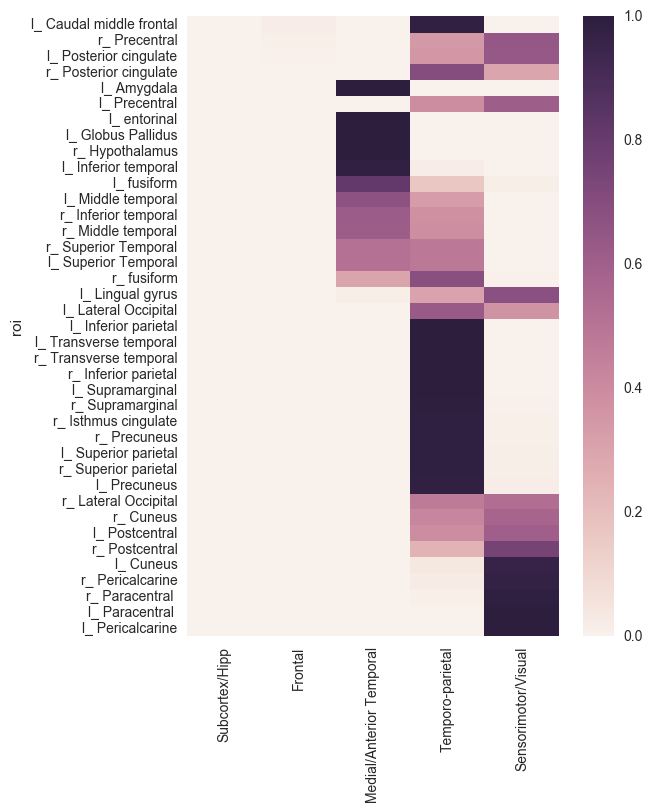

In [141]:
plt.close()
fig, ax = plt.subplots(figsize=(6,8))
sns.heatmap(spercs.astype(np.float64)[39:])
fig.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/desikan_rois1.pdf',
            bbox_inches='tight')
plt.show()

In [87]:
i = 2
print(np.bincount(vcore_img[dkt==i]))
print(np.unique(vcore_img[dkt==i]))
print(len(vcore_img[dkt==i]))

[11303     0     0     0  3341]
[0 4]
14644


In [76]:
vcore_img.dtype

dtype('<f8')

In [81]:
dkt.dtype

dtype('int64')

# Compare ADNI & LUND parcellations

In [6]:
from nilearn import plotting, image, input_data
from scipy import stats

In [13]:
lund_cons = ni.load('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/brain_partition_consensus_ind_lund_sci5_scf5.nii.gz'
                   )
lund_core = ni.load('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/brain_partition_core_ind_lund_sci5_scf5.nii.gz'
                   )
adni_cons6 = ni.load('/Users/jakevogel/Science/tau/msteps_output/lib_mask/adni/sci5_scf6/brain_partition_consensus_ind_adni_sci5_scf6.nii'
                    )
adni_core6 = ni.load('/Users/jakevogel/Science/tau/msteps_output/lib_mask/adni/sci5_scf6/brain_partition_core_ind_adni_sci5_scf6.nii'
                    )

In [15]:
lund_core = ni.load('/home/users/jvogel/Science/templates/atlases/1mm_lund/brain_partition_core_ind_lund_sci5_scf5.nii.gz')

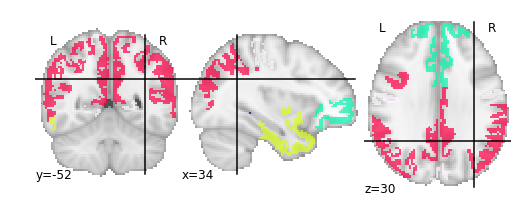

In [16]:
plt.close()
plotting.plot_roi(lund_core)
plt.show()

In [20]:
lund_core.affine

array([[  -1.,    0.,    0.,   90.],
       [   0.,    1.,    0., -126.],
       [   0.,    0.,    1.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [17]:
# PERSONAL COMPUTER
maskr = ni.load('/Users/jakevogel/Science/tau/msteps_output/cons_mask/sci5_scf7/brain_partition_consensus_ind_adni_sci5_scf7.nii'
                )
aff = maskr.affine
maskr = maskr.get_data()
maskr[maskr>0] = 1
mask_img = ni.Nifti1Image(maskr,aff)
mni2mm = '/usr/local/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz'

In [19]:
mm2s = {}
for img,label in {mask_img:'mask',lund_core:'lund_core',lund_cons:'lund_cons',
                  adni_cons6:'adni_cons',adni_core6:'adni_core'}.items():
    mm2s.update({label: image.resample_to_img(img,mni2mm,interpolation='nearest')})
    

//anaconda/envs/py3/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


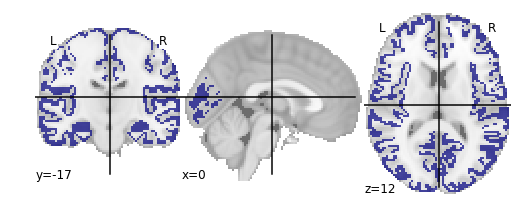

In [21]:
plt.close()
plotting.plot_roi(mm2s['mask'])
plt.show()

In [29]:
mm2s['lund_cons'].get_data()[mm2s['mask'].get_data()>0].shape

(57647,)

In [32]:
normalized_mutual_info_score(mm2s['lund_cons'].get_data()[mm2s['lund_cons'].get_data()>0],
                            mm2s['adni_cons'].get_data()[mm2s['lund_cons'].get_data()>0])

0.18042223035118515

In [33]:
normalized_mutual_info_score(mm2s['lund_core'].get_data()[mm2s['lund_core'].get_data()>0],
                            mm2s['adni_core'].get_data()[mm2s['lund_core'].get_data()>0])

0.20683805770518549

In [91]:
import scipy.spatial.distance as dist

In [92]:
dist.jaccard(mm2s['lund_core'].get_data()[mm2s['lund_core'].get_data()>0],
                            mm2s['adni_core'].get_data()[mm2s['lund_core'].get_data()>0])

0.94717107305772497

In [95]:
dist.cosine(mm2s['lund_core'].get_data()[mm2s['lund_core'].get_data()>0],
                            mm2s['adni_core'].get_data()[mm2s['lund_core'].get_data()>0])

0.4372348297517612

In [ ]:
dist.d

In [37]:
tauz = sorted(glob('/Users/jakevogel/Science/tau/nan_snorm*'))
catch = []
x,y,z = mm2s['lund_core'].shape
for i,tau in enumerate(tauz):
    jnk = ni.load(tau)
    jnk2mm = image.resample_to_img(jnk,mni2mm).get_data()
    jnk2mm = jnk2mm.reshape(x,y,z,1)
    catch.append(jnk2mm)
    if i%10==0:
        print('finished',i)
print('contatenating')
i4d = np.concatenate(catch,3)
del(catch)

//anaconda/envs/py3/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


finished 0
finished 10
finished 20
finished 30
finished 40
finished 50
finished 60
finished 70
finished 80
contatenating


In [121]:
ni.Nifti1Image(i4d, aff).to_filename('/Users/jakevogel/Science/tau/tau4d_2mm')

In [56]:
i4d = ni.load('/home/users/jvogel/Science/ADNI_tau/template_space/tau_images/tau4d_')

In [38]:
i4d.shape

(91, 109, 91, 90)

In [54]:
mask2 = np.zeros_like(mm2s['lund_cons'].get_data())
mask2[mm2s['lund_cons'].get_data()>0] = 1
mask2 = ni.Nifti1Image(mask2,mm2s['lund_cons'].affine)
m_tfm = input_data.NiftiMasker(mask2)
m_clusters = m_tfm.fit_transform(mm2s['lund_cons'])
m_tau = m_tfm.fit_transform(ni.Nifti1Image(i4d,mm2s['lund_cons'].affine))

In [71]:
m_clusters.shape[1]

81674

(91, 109, 91, 90)

In [73]:
clust_coords = np.where(m_clusters==1)
selector = np.random.randint(0,len(clust_coords[0]),100)
results = np.zeros((100,m_clusters.shape[1]))
for i in range(100):
    vox = clust_coords[1][selector[i]]
    vec = m_tau[:,vox]
    r_vec = [stats.pearsonr(vec, m_tau[:,x])[0] for x in range(m_clusters.shape[1])]
    results[i,:] = r_vec
    print('finished',i)

finished 0
finished 1
finished 2
finished 3
finished 4
finished 5
finished 6
finished 7
finished 8
finished 9
finished 10
finished 11
finished 12
finished 13
finished 14
finished 15
finished 16
finished 17
finished 18
finished 19
finished 20
finished 21
finished 22
finished 23
finished 24
finished 25
finished 26
finished 27
finished 28
finished 29
finished 30
finished 31
finished 32
finished 33
finished 34
finished 35
finished 36
finished 37
finished 38
finished 39
finished 40
finished 41
finished 42
finished 43
finished 44
finished 45
finished 46
finished 47
finished 48
finished 49
finished 50
finished 51
finished 52
finished 53
finished 54
finished 55
finished 56
finished 57
finished 58
finished 59
finished 60
finished 61
finished 62
finished 63
finished 64
finished 65
finished 66
finished 67
finished 68
finished 69
finished 70
finished 71
finished 72
finished 73
finished 74
finished 75
finished 76
finished 77
finished 78
finished 79
finished 80
finished 81
finished 82
finished 83
fi

In [83]:
meanr = results.mean(0)
print('10:',sorted(meanr)[int(len(meanr)*0.9)])
print('5:',sorted(meanr)[int(len(meanr)*0.95)])
print('2:',sorted(meanr)[int(len(meanr)*0.98)])
clus1_rs = m_tfm.inverse_transform(meanr)

10: 0.333162143528
5: 0.402594647706
2: 0.482964600176


//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


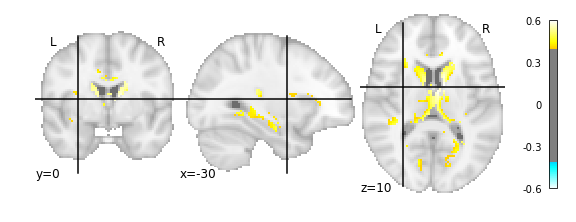

In [97]:
plt.close()
plotting.plot_stat_map(clus1_rs, threshold=0.40259,cut_coords=[-30,0,10])
plt.show()

In [53]:
i4d_2mm = image.resample_to_img(i4d,mni2mm)

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


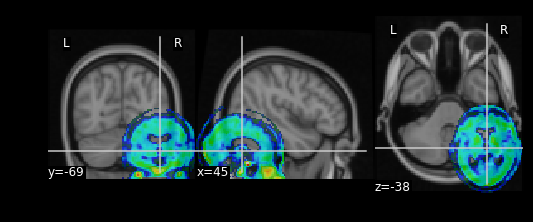

In [55]:
jnk = ni.Nifti1Image(i4d_2mm.get_data()[:,:,:,0], i4d_2mm.affine)
plt.close()
plotting.plot_roi(jnk, mni2mm)
plt.show()

In [26]:
#### REPEATING ON WORK COMPUTER

maskr = ni.load('/home/users/jvogel/Science/templates/atlases/1mm_lund/brain_partition_consensus_ind_lund_sci5_scf5.nii.gz'
                )
aff = maskr.affine
maskr = maskr.get_data()
maskr[maskr>0] = 1
mask_img = ni.Nifti1Image(maskr,aff)
mni2mm = '/usr/share/fsl/5.0/data/standard/MNI152_T1_2mm.nii.gz'
maskr = image.resample_to_img(mask_img, mni2mm, interpolation='nearest')
lund_2mm = image.resample_to_img(lund_core,mni2mm,interpolation='nearest')

m_tfm = input_data.NiftiMasker(maskr)
m_clusters = m_tfm.fit_transform(lund_2mm)
m_tau = m_tfm.fit_transform(i4d)

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


In [35]:
vec

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [48]:
i4d.get_data()

memmap([[[[ -1.85150348e-15,  -8.34928119e-17,  -4.25557055e-26, ...,
             2.18900343e-04,   1.73971750e-17,  -1.21781239e-19],
          [ -3.22002523e-14,   2.39474320e-15,   8.17376440e-26, ...,
             7.43967947e-04,   1.24822216e-16,  -5.40173238e-19],
          [ -1.53884460e-13,  -4.34257995e-15,  -5.63428322e-25, ...,
             3.90468747e-03,   5.05314657e-16,  -5.23147923e-20],
          ..., 
          [  0.00000000e+00,  -0.00000000e+00,   5.78999054e-04, ...,
             2.13743995e-22,  -2.69470867e-25,   0.00000000e+00],
          [  0.00000000e+00,  -0.00000000e+00,   1.35791692e-04, ...,
             6.24339245e-21,  -1.18021406e-25,   0.00000000e+00],
          [  0.00000000e+00,  -0.00000000e+00,   6.99747125e-06, ...,
             3.79798635e-22,  -2.37629079e-26,  -0.00000000e+00]],

         [[  4.81882126e-15,  -6.85342034e-16,   1.81037415e-32, ...,
            -2.51626159e-04,   8.12584051e-17,  -1.76159240e-19],
          [ -9.07314927e-15,  

In [40]:
vox

54697

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in float_scalars
  r = r_num / r_den


finished 0
finished 10
finished 20
finished 30
finished 40
finished 50
finished 60
finished 70
finished 80
finished 90
1.0 10: nan
1.0 5: nan
1.0 2: nan


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/numpy/ma/core.py:2166: RuntimeWarning: invalid value encountered in greater_equal
  condition = (xf >= v1) & (xf <= v2)
/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/numpy/ma/core.py:2166: RuntimeWarning: invalid value encountered in less_equal
  condition = (xf >= v1) & (xf <= v2)


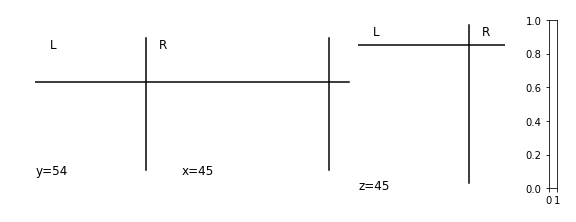

finished 0
finished 10
finished 20
finished 30


KeyboardInterrupt: 

In [30]:
correl_results = {}
for clust in np.unique(lund_2mm.get_data())[1:]:
    clust_coords = np.where(m_clusters==clust)
    selector = np.random.randint(0,len(clust_coords[0]),100)
    results = np.zeros((100,m_clusters.shape[1]))
    for i in range(100):
        vox = clust_coords[1][selector[i]]
        vec = m_tau[:,vox]
        r_vec = [stats.pearsonr(vec, m_tau[:,x])[0] for x in range(m_clusters.shape[1])]
        results[i,:] = r_vec
        if i%10 == 0:
            print('finished',i)
    meanr = results.mean(0)
    print(clust,'10:',sorted(meanr)[int(len(meanr)*0.9)])
    print(clust,'5:',sorted(meanr)[int(len(meanr)*0.95)])
    print(clust,'2:',sorted(meanr)[int(len(meanr)*0.98)])
    thr5 = sorted(meanr)[int(len(meanr)*0.9)]
    clus_rs = m_tfm.inverse_transform(meanr)
    plt.close()
    plotting.plot_stat_map(clus_rs, threshold=thr5)
    plt.show()
    correl_results.update({clust: clus_rs})
    

In [25]:
i4d.shape

(91, 109, 91, 90)

In [80]:
len(meanr)*.9

73506.6

In [55]:
m_tau.shape

(90, 81674)

In [64]:
clust_coords[1][50]

19299

In [102]:
# Now for some cross-sectional associations
#cs = pandas.read_csv('/Users/jakevogel/Science/tmp/tau/tau_adni_demo_cogchange_litROIs_updated.csv')
cs = pandas.read_csv('/Users/jakevogel/Science/tau/tau_adni_demo_cogchange_litROIs_earlytau.csv',
                    index_col=0)
#cs.columns[-60:]

In [108]:
tauz[0]

'/Users/jakevogel/Science/tau/nan_snorm_002-S-4229_18F-AV1451_2016-02-10_P4_I635352.nii.gz'

In [116]:
good_scans = []
gsubs = cs[(cs['av45_status_wcb']==1) | (cs.DX_final=='NL')].subs.values
for sub in gsubs:
    good_scans.append([x for x in tauz if sub in x][0])


In [119]:
len(good_scans)

68

In [122]:
catch = []
x,y,z = mm2s['lund_core'].shape
for i,tau in enumerate(good_scans):
    jnk = ni.load(tau)
    jnk2mm = image.resample_to_img(jnk,mni2mm).get_data()
    jnk2mm = jnk2mm.reshape(x,y,z,1)
    catch.append(jnk2mm)
    if i%10==0:
        print('finished',i)
print('contatenating')
i4d = np.concatenate(catch,3)
del(catch)

//anaconda/envs/py3/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


finished 0
finished 10
finished 20
finished 30
finished 40
finished 50
finished 60
contatenating


In [123]:
ni.Nifti1Image(i4d, aff).to_filename('/Users/jakevogel/Science/tau/tau4d_2mm_LUNDmatched_sample')